In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import calendar

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_f = pd.read_csv('../feature_eng/features.csv', index_col=0)
labels = pd.read_csv('../data/labels.csv', index_col=0)

df = labels.join(df_f)
df

,n_cited,citation_class,refs_count,telegram_len,month,month_citation_rate_to_global_ratio,year_citation_rate_to_global_ratio,author_all_time_citation_rate_to_global_ratio,author_year_citation_rate_to_global_ratio,author_month_citation_rate_to_global_ratio,author_activity_frac_year,author_activity_frac_month,topics_all_time_citation_rate_to_global_ratio,topics_year_citation_rate_to_global_ratio,topics_month_citation_rate_to_global_ratio,topics_activity_frac_year,topics_activity_frac_month,topics_weight_coef_all_time,topics_weight_coef_year,topics_weight_coef_month
telegram_index,,,,,,,,,,,,,,,,,,,,
3_atel,0,0,0,1010,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2_atel,0,0,0,907,12,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4_atel,0,0,0,3607,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
5_atel,0,0,0,1509,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
6_atel,0,0,0,427,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16033_atel,0,0,2,1808,5,0.621230,0.685940,0.430243,0.167262,0.000000,0.750000,0.250000,1.039836,0.989255,0.742432,0.058607,0.002090,0.871856,0.794790,0.959072
16034_atel,0,0,0,582,5,0.665457,0.680998,0.000000,0.000000,0.000000,0.750000,0.000000,0.745930,0.709567,1.097561,0.032785,0.001444,0.181668,0.219660,0.228022
16035_atel,0,0,0,1605,5,0.656715,0.680707,0.000000,0.000000,0.000000,1.000000,0.000000,1.079688,0.911142,0.660414,0.056395,0.002032,0.446004,0.383207,0.444315


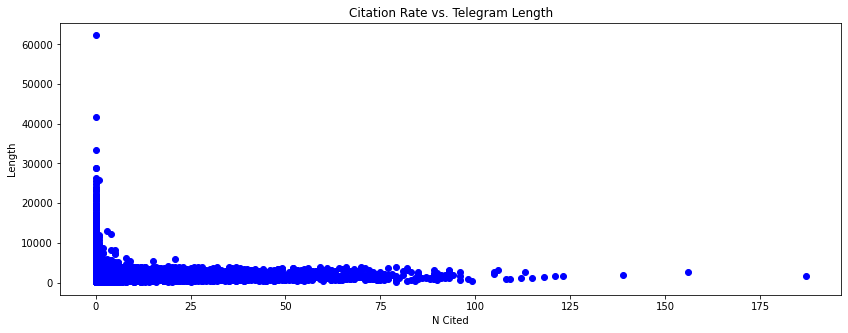

In [3]:
plt.rcParams["figure.figsize"] = (14, 5)

plt.scatter(df.n_cited.values, df["telegram_len"], color='blue')
plt.title("Citation Rate vs. Telegram Length")
plt.xlabel("N Cited")
plt.ylabel("Length")
plt.show()

In [4]:
np.corrcoef(df.n_cited.values, df["telegram_len"])  # no correlation

array([[1.        , 0.05337344],
       [0.05337344, 1.        ]])

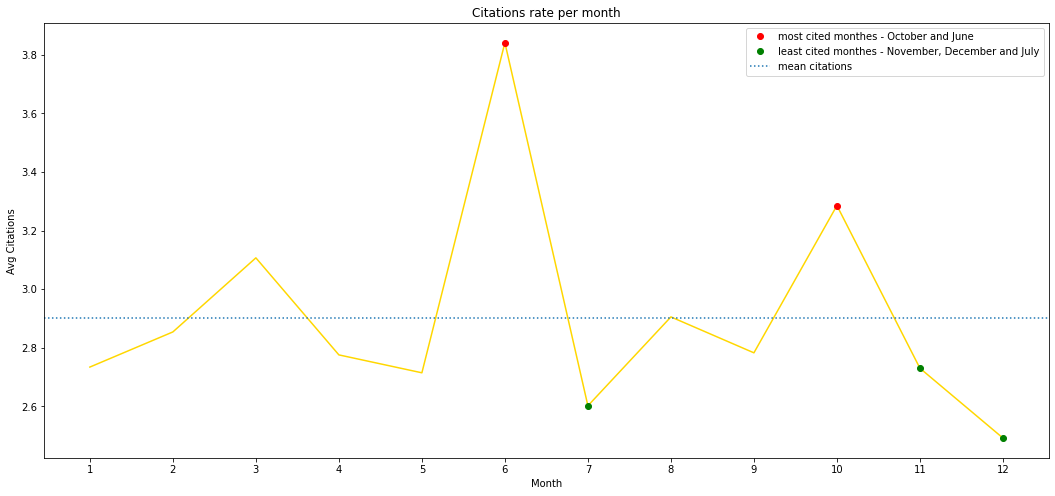

In [5]:
citations_by_month = df.groupby([df.month]).agg({'n_cited': 'mean'})

plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='month', data=citations_by_month, color='gold', alpha=1)
plt.plot(10, citations_by_month.loc[10].n_cited, 'bo', color='red', label='most cited monthes - October and June') 
plt.plot(6, citations_by_month.loc[6].n_cited, 'bo', color='red')
plt.plot(11, citations_by_month.loc[11].n_cited, 'bo', color='green', label='least cited monthes - November, December and July')
plt.plot(7, citations_by_month.loc[7].n_cited, 'bo', color='green')
plt.plot(12, citations_by_month.loc[12].n_cited, 'bo', color='green')
plt.axhline(citations_by_month.n_cited.mean(), linestyle='dotted', label='mean citations')
plt.legend()
plt.title("Citations rate per month")
plt.ylabel("Avg Citations")
plt.xlabel("Month")
plt.xticks([*range(1, 13)])
plt.show()

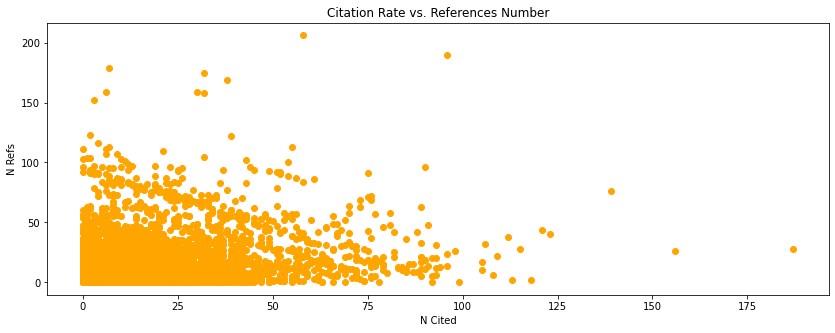

In [6]:
plt.rcParams["figure.figsize"] = (14, 5)

plt.scatter(df.n_cited.values, df["refs_count"], color='orange')
plt.title("Citation Rate vs. References Number")
plt.xlabel("N Cited")
plt.ylabel("N Refs")
plt.show()

In [7]:
np.corrcoef(df.n_cited.values, df["refs_count"])  # weak correlation

array([[1.       , 0.4431681],
       [0.4431681, 1.       ]])

In [8]:
df.corr()

,n_cited,citation_class,refs_count,telegram_len,month,month_citation_rate_to_global_ratio,year_citation_rate_to_global_ratio,author_all_time_citation_rate_to_global_ratio,author_year_citation_rate_to_global_ratio,author_month_citation_rate_to_global_ratio,author_activity_frac_year,author_activity_frac_month,topics_all_time_citation_rate_to_global_ratio,topics_year_citation_rate_to_global_ratio,topics_month_citation_rate_to_global_ratio,topics_activity_frac_year,topics_activity_frac_month,topics_weight_coef_all_time,topics_weight_coef_year,topics_weight_coef_month
n_cited,1.000000,0.755422,0.443168,0.053373,-0.003803,0.122683,0.052755,0.384948,0.366127,0.247834,-0.054580,-0.011471,0.214241,0.238302,0.256242,-0.001461,-0.009133,-0.002650,0.004355,0.016097
citation_class,0.755422,1.000000,0.392152,0.055226,-0.007459,0.095326,0.051906,0.372479,0.340592,0.231055,-0.070137,-0.029111,0.240734,0.255242,0.254470,0.000031,-0.008498,0.002666,0.002983,0.017953
refs_count,0.443168,0.392152,1.000000,0.070005,-0.002353,0.061474,-0.014305,0.330747,0.311179,0.155766,-0.080650,-0.017489,0.171016,0.184852,0.183100,-0.072341,-0.034325,-0.000027,0.002279,0.026364
telegram_len,0.053373,0.055226,0.070005,1.000000,-0.007100,-0.058996,-0.107004,0.060353,0.053338,0.019444,-0.038341,-0.030798,0.083772,0.068058,0.051027,-0.124026,-0.055716,0.027322,0.017393,0.030371
month,-0.003803,-0.007459,-0.002353,-0.007100,1.000000,0.023064,0.006387,-0.002615,0.000146,-0.001778,0.003044,-0.017719,-0.000753,-0.003506,-0.019582,-0.022699,-0.053063,0.007304,0.004466,0.001729
month_citation_rate_to_global_ratio,0.122683,0.095326,0.061474,-0.058996,0.023064,1.000000,0.388760,0.086467,0.055694,-0.023855,0.019165,0.015020,0.062034,0.077630,0.036408,0.156606,0.084028,-0.016581,-0.004650,-0.000755
year_citation_rate_to_global_ratio,0.052755,0.051906,-0.014305,-0.107004,0.006387,0.388760,1.000000,0.072069,-0.006888,-0.018412,0.066091,0.032089,0.090547,0.109825,0.065449,0.244015,0.084700,-0.025361,-0.003536,-0.005029
author_all_time_citation_rate_to_global_ratio,0.384948,0.372479,0.330747,0.060353,-0.002615,0.086467,0.072069,1.000000,0.760495,0.355929,0.009092,0.024011,0.287989,0.296771,0.243349,0.021082,-0.003904,-0.004444,0.006719,0.035986
author_year_citation_rate_to_global_ratio,0.366127,0.340592,0.311179,0.053338,0.000146,0.055694,-0.006888,0.760495,1.000000,0.458083,0.034850,0.033015,0.218752,0.249241,0.212939,0.001390,-0.009859,-0.004759,0.000577,0.025859
author_month_citation_rate_to_global_ratio,0.247834,0.231055,0.155766,0.019444,-0.001778,-0.023855,-0.018412,0.355929,0.458083,1.000000,0.031791,0.115752,0.120895,0.131350,0.176332,-0.000733,0.001417,-0.007048,-0.004942,-0.005763


<AxesSubplot:>

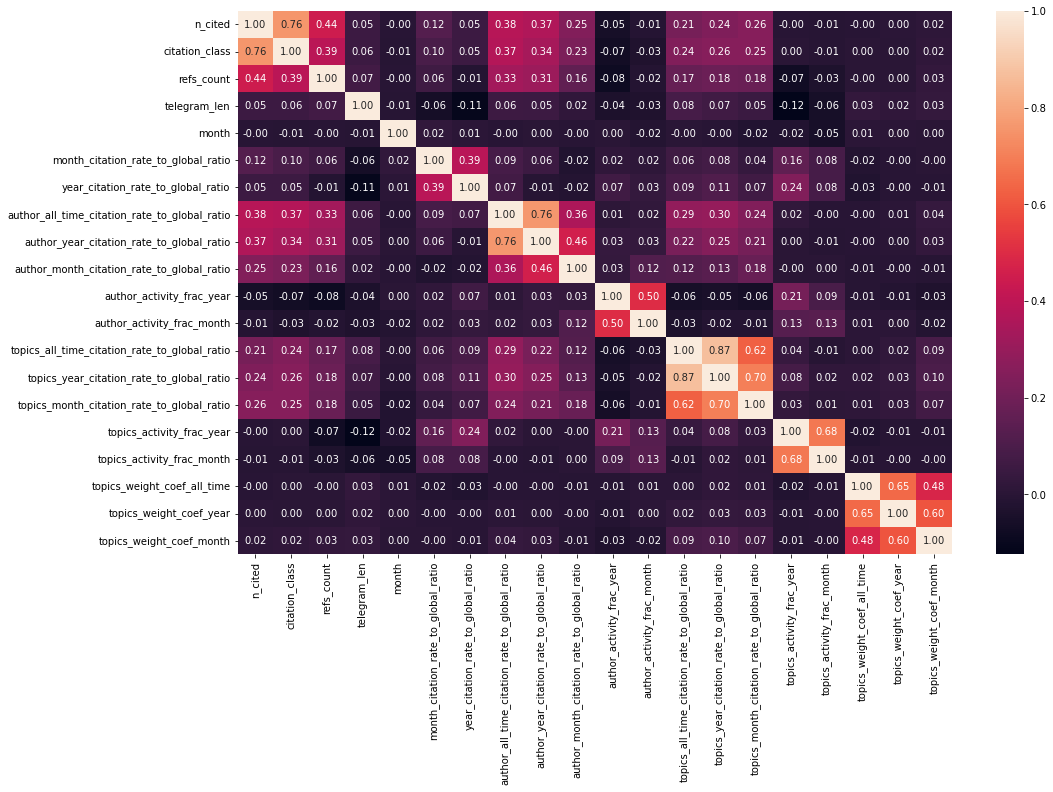

In [9]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [10]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation lower than 0.2
to_drop = [column for column in upper.columns if upper.loc['n_cited'][column] < 0.2]

# Drop features 
df_c = df.drop(to_drop, axis=1)

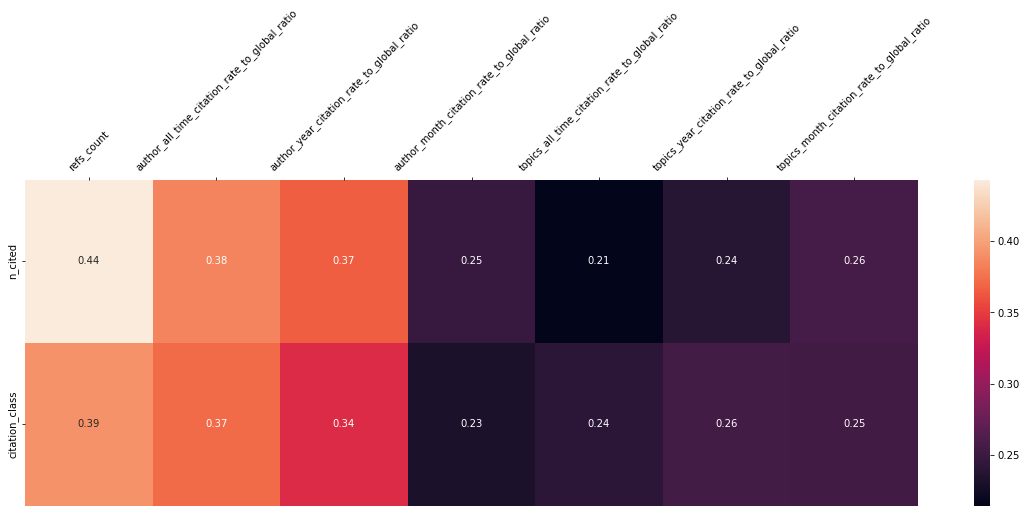

In [11]:
plt.rcParams["figure.figsize"] = (20, 6)
ax = sns.heatmap(df_c.corr().loc[['n_cited', 'citation_class']].drop(columns=['n_cited', 'citation_class']), annot=True, fmt=".2f")
ax.xaxis.tick_top()
plt.xticks(rotation='45')
plt.show()

### tel len by years and author telegrams

In [19]:
date_df = pd.read_csv("../data/assembled.csv", index_col=0)[['date']]

In [20]:
df = df.join(date_df)

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df = df.reset_index().set_index("date")

In [32]:
df = df[df['telegram_len'] < 40000]

In [36]:
df = df.loc['1998-01-01':]

In [46]:
mean_by_year = df.groupby(df.index.year)['telegram_len'].mean()

In [114]:
median_by_year = df.groupby(df.index.year)['telegram_len'].median()

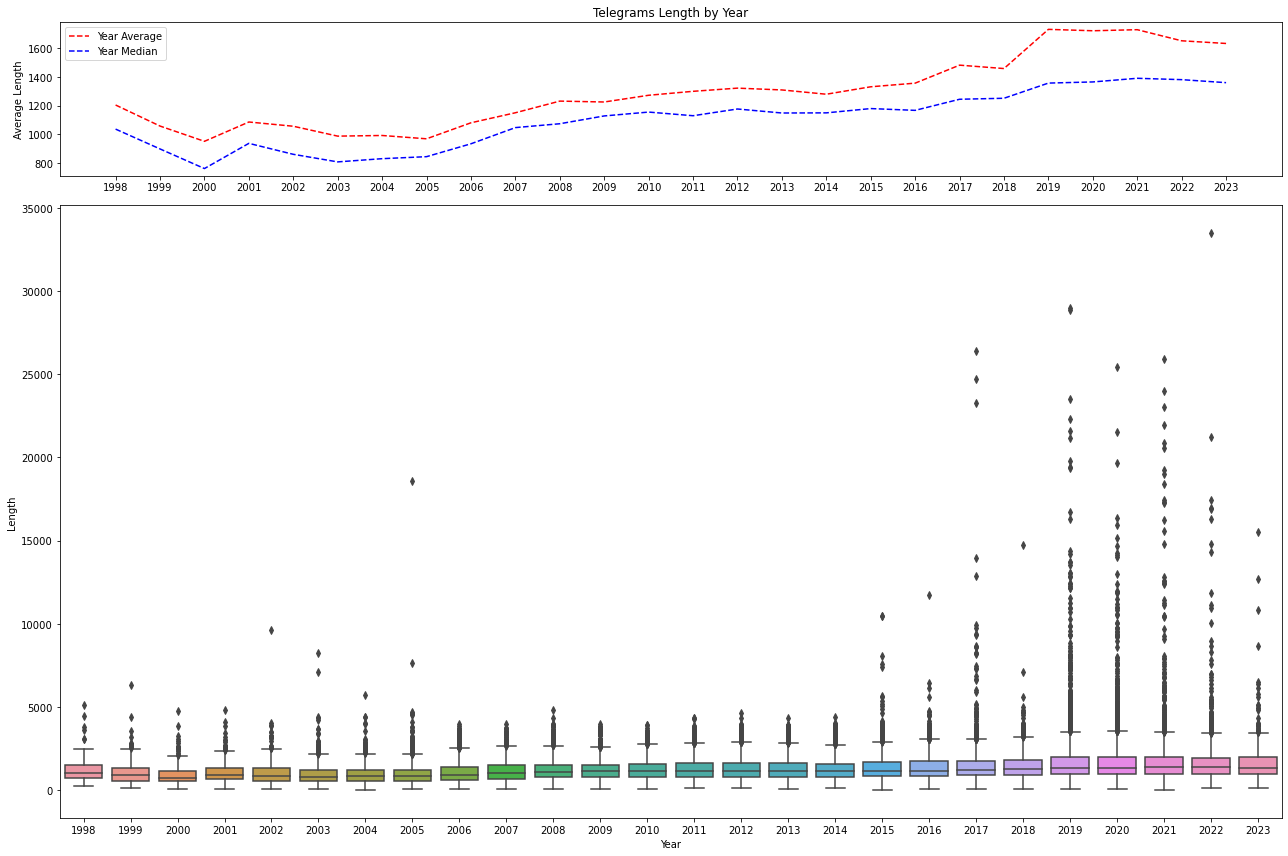

In [115]:
plt.rcParams["figure.figsize"] = (18, 12)
fig, ax = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 4]})

ax[0].plot(mean_by_year.index.values, mean_by_year.values, color='red', linestyle='--', label='Year Average')
ax[0].plot(median_by_year.index.values, median_by_year.values, color='blue', linestyle='--', label='Year Median')
ax[0].set_title("Telegrams Length by Year")
ax[0].set_ylabel("Average Length")
ax[0].set_xticks([*range(mean_by_year.index.min(), mean_by_year.index.max()+1)])
ax[0].legend()


ax[1] = sns.boxplot(x = df.index.year, 
                y = df['telegram_len'], labels=['Length Boxplot'])
                # showmeans=True,)
ax[1].set_ylabel("Length")
ax[1].set_xlabel("Year")


fig.tight_layout()
fig.show()

In [116]:
# author activities

In [120]:
from_df = pd.read_csv("../data/assembled.csv", index_col=0)[['from']]

In [121]:
df = df.reset_index().set_index("telegram_index").join(from_df)

In [127]:
len(df)/len(df['from'].unique())  # avg telegrams from one author

16.156291834002676

In [179]:
most_active_authors = df.groupby("from")[['date']].count().sort_values("date").iloc[: : -1][:100]

In [180]:
most_active_authors # 10 most active authors

,date
from,
pae9@leicester.ac.uk,1757
lipunov@xray.sai.msu.ru,1680
apozanen@iki.rssi.ru,923
scott@lheamail.gsfc.nasa.gov,875
tiurina@sai.msu.ru,793
...,...
huyoudong072@hotmail.com,80
malesani@sissa.it,80
femarsha@khamseen.gsfc.nasa.gov,80


In [181]:
most_active_authors_names = most_active_authors.index.values

In [182]:
most_active_authors.reset_index()

,from,date
0,pae9@leicester.ac.uk,1757
1,lipunov@xray.sai.msu.ru,1680
2,apozanen@iki.rssi.ru,923
3,scott@lheamail.gsfc.nasa.gov,875
4,tiurina@sai.msu.ru,793
...,...,...
95,huyoudong072@hotmail.com,80
96,malesani@sissa.it,80
97,femarsha@khamseen.gsfc.nasa.gov,80
98,hans.a.krimm@nasa.gov,80


In [183]:
df_authors = most_active_authors.rename(columns={"date": "author_messages"}).join(df.reset_index().set_index("from"))

In [184]:
cols_to_keep = [c for c in df_authors.columns if c.startswith("author")]

In [185]:
df_authors = df_authors[cols_to_keep]

In [186]:
cols_to_keep

['author_messages',
 'author_all_time_citation_rate_to_global_ratio',
 'author_year_citation_rate_to_global_ratio',
 'author_month_citation_rate_to_global_ratio',
 'author_activity_frac_year',
 'author_activity_frac_month']

In [189]:
temp = df_authors.reset_index().groupby('from').agg({'author_all_time_citation_rate_to_global_ratio': 'last'}).sort_values("author_all_time_citation_rate_to_global_ratio").iloc[: : -1][:100]

In [192]:
len(temp[temp.author_all_time_citation_rate_to_global_ratio > 0.92])

24

In [193]:
temp.mean()

author_all_time_citation_rate_to_global_ratio    0.820282
dtype: float64

In [195]:
best = df.groupby('from').agg({'author_all_time_citation_rate_to_global_ratio': 'last'}).sort_values("author_all_time_citation_rate_to_global_ratio").iloc[: : -1][:100]

In [197]:
author_act = df.groupby("from")[['date']].count().sort_values("date").iloc[: : -1]

In [200]:
best.join(author_act).iloc[:60]

,author_all_time_citation_rate_to_global_ratio,date
from,,
egallo@science.uva.nl,28.424309,2
georgios.vasilopoulos@yale.edu,23.013993,2
andber@utu.fi,20.087279,2
mds@mssl.ucl.ac.uk,19.322193,2
albert@cab.inta-csic.es,18.475191,2
julie.mcenery@nasa.gov,17.937934,3
michael.peel@manchester.ac.uk,17.101846,2
eiken@astro.ufl.edu,17.007578,3
eric@astro.columbia.edu,15.136408,2
